# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# =============================================================
# 1.
# =============================================================
sells_csv_url = "./Ventas.csv"
sells_df = pd.read_csv(sells_csv_url)
sells_df.head()

sells_df["Fecha"] = pd.to_datetime(sells_df["Fecha"])

# normalize data
sells_scaler = MinMaxScaler(feature_range=(0, 1))
sells_columns_to_scale = sells_df.drop(["Ventas", "Fecha"], axis=1).columns
print(sells_columns_to_scale)
colums_scaled = sells_scaler.fit_transform(sells_df[sells_columns_to_scale])
df_normalize = pd.DataFrame(data=colums_scaled, columns=sells_columns_to_scale)
df_normalize["Ventas"] = sells_df["Ventas"]
df_normalize["Fecha"] = sells_df["Fecha"]

# divide to train and test
X = df_normalize.drop(["Ventas", "Fecha"], axis=1)
Y = df_normalize["Ventas"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

Index(['DíaDeLaSemana', 'Promociones', 'Festivo'], dtype='object')


# 2. Análisis Exploratorio de Datos (EDA)

In [18]:
# =============================================================
# 2. Análisis Exploratorio de Datos (EDA)
# =============================================================
sells_df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


Text(0, 0.5, 'Frecuencia')

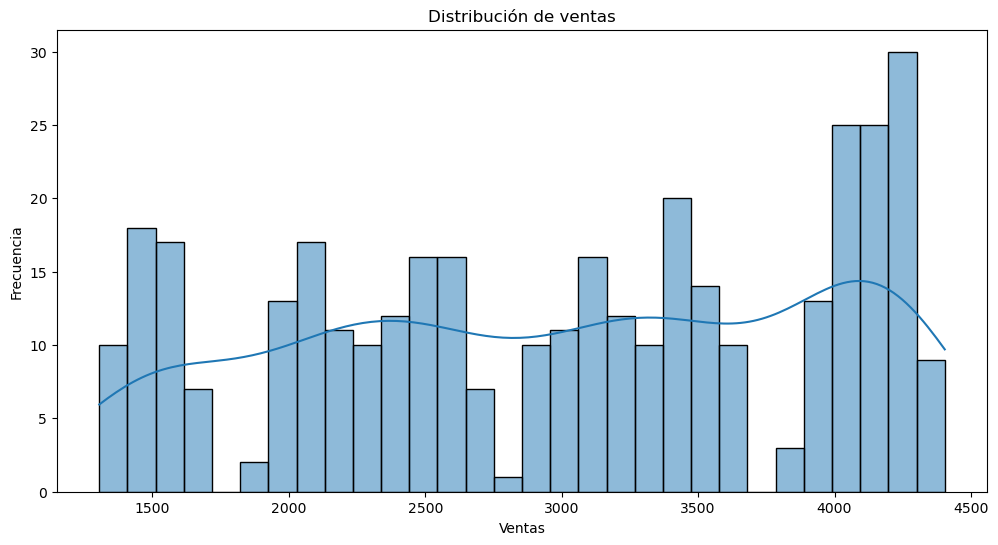

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(sells_df["Ventas"], bins=30, kde=True)
plt.title("Distribución de ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'ventas promedio')

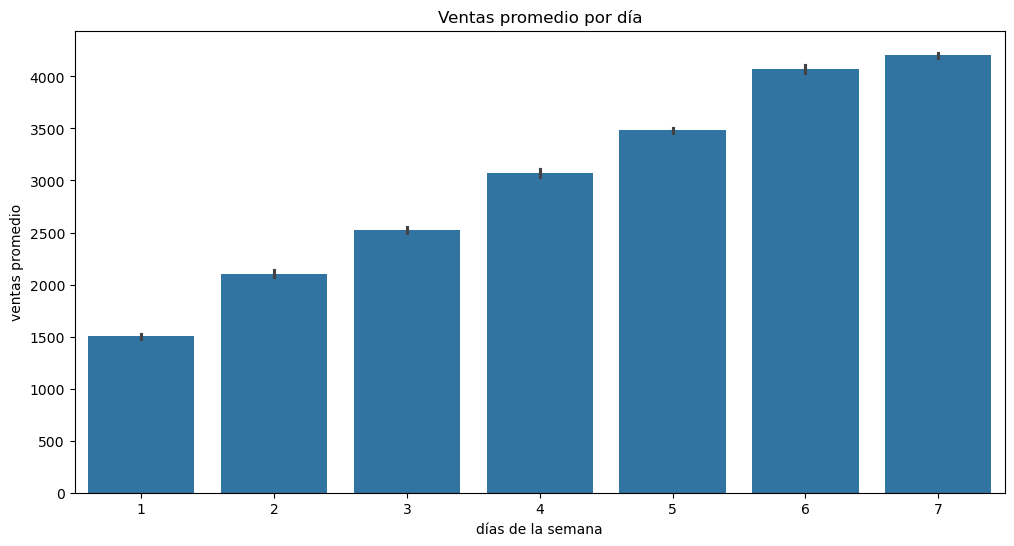

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=sells_df, x="DíaDeLaSemana", y="Ventas")
plt.title("Ventas promedio por día")
plt.xlabel("días de la semana")
plt.ylabel("ventas promedio")

/tmp/ipykernel_247470/2908681275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sells_df, x="Promociones", y="Ventas", palette="Set2")
/tmp/ipykernel_247470/2908681275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sells_df, x="Festivo", y="Ventas", palette="Set2")


Text(0.5, 1.0, 'efecto promociones y festivos')

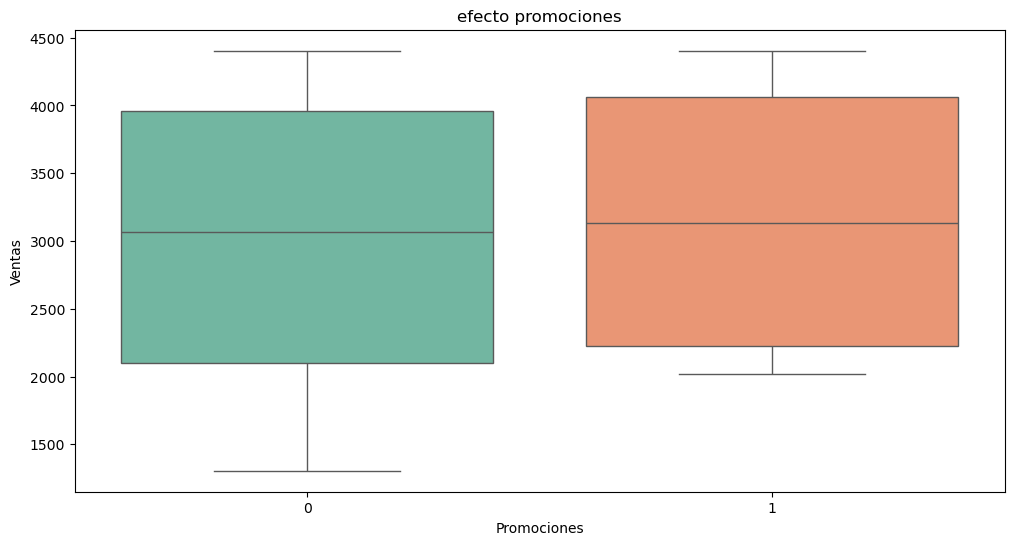

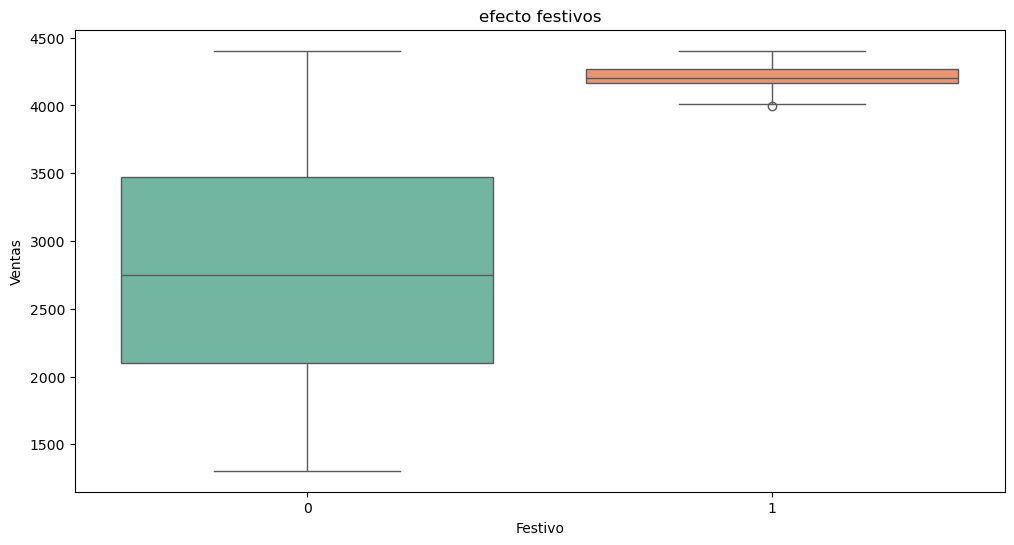

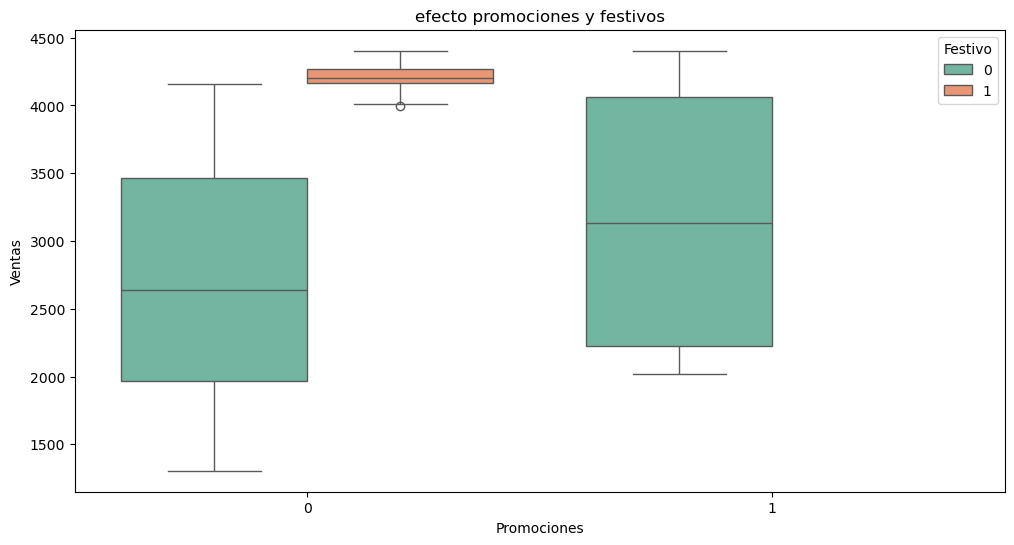

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=sells_df, x="Promociones", y="Ventas", palette="Set2")
plt.title("efecto promociones")

plt.figure(figsize=(12,6))
sns.boxplot(data=sells_df, x="Festivo", y="Ventas", palette="Set2")
plt.title("efecto festivos")

plt.figure(figsize=(12,6))
sns.boxplot(data=sells_df, x="Promociones", y="Ventas", hue="Festivo", palette="Set2")
plt.title("efecto promociones y festivos")


# 3. Selección de Modelo

In [31]:

# init && train the models
models = [
    ("linear regression", LinearRegression()),
    ("decision tree regressor", DecisionTreeRegressor()),
    ("random forest regressor", RandomForestRegressor() )
]

for name, model in models:
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"score of {name}: {score:.10f}")

score of linear regression: 0.9924245101
score of decision tree regressor: 0.9923508015
score of random forest regressor: 0.9923129436


# 4. Entrenamiento y Evaluación del Modelo

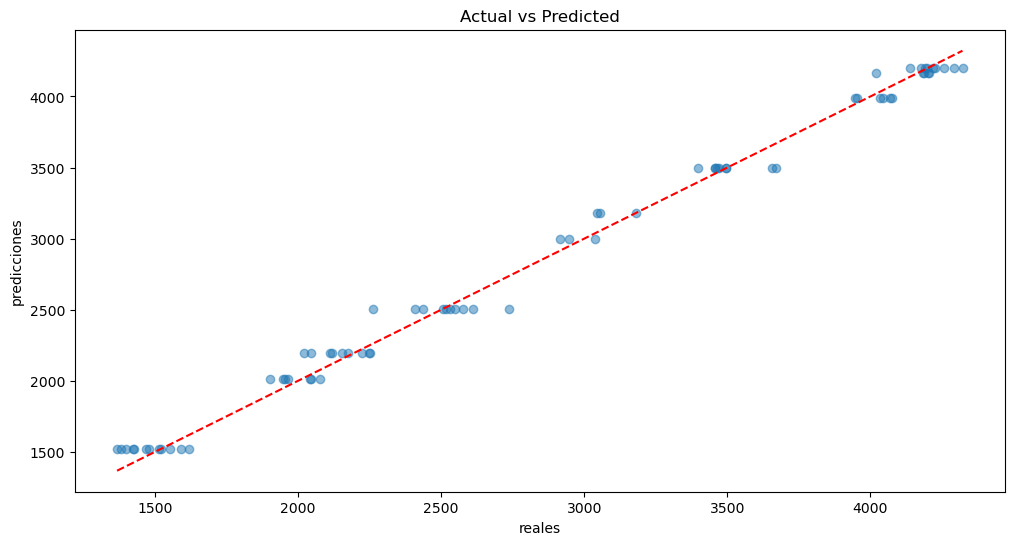

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("reales")
plt.ylabel("predicciones")
plt.title("Actual vs Predicted")
plt.show()

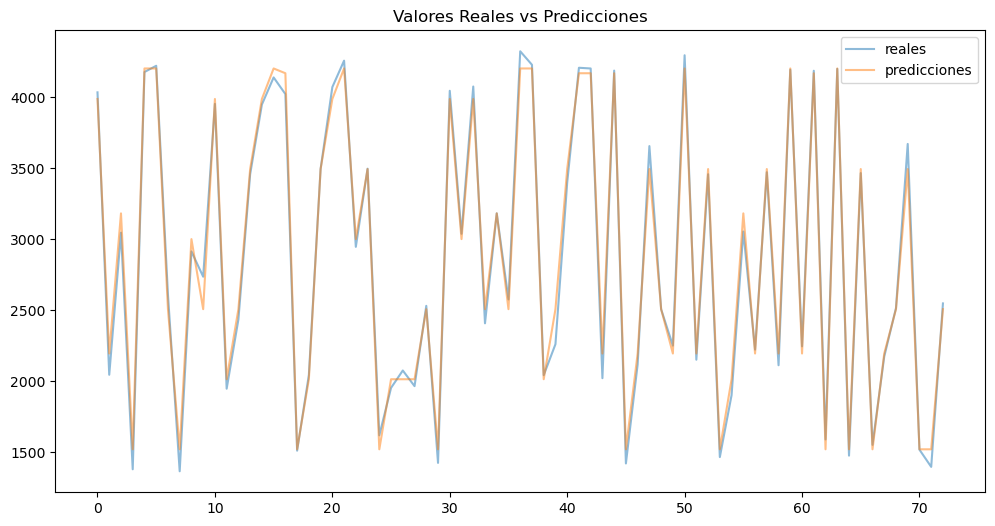

In [38]:
df_test = pd.DataFrame({"reales": y_test, "predicciones": predictions})
df_test = df_test.sort_index()

plt.figure(figsize=(12,6))
plt.plot(df_test["reales"].values, label="reales", alpha=0.5)
plt.plot(df_test["predicciones"].values, label="predicciones", alpha=0.5)
plt.title("Valores Reales vs Predicciones")
plt.legend()
plt.show()